<a href="https://colab.research.google.com/github/hagijakobson/GitTrainingWall/blob/master/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction Algorithms Applied to Stock Price Forecasting
## Dimensionality Reduction

## Introduction

## Installations

## Import Libraries

In [1]:
# Processing
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Modeling
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import manifold

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns

# Save models
import joblib

## Load Data

In [2]:
trainingset = pd.read_csv('/content/trainingset.csv', index_col=['Date'])
X_train = trainingset.drop(['D+1 ALTA'], axis=1)
y_train = trainingset['D+1 ALTA']

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (5667, 142)
y_train shape: (5667,)


## Data Preparation

### Descartando colunas com valores "infinitos"

In [3]:
X_train = X_train.drop(['COSH', 'EXP', 'SINH'], axis=1)
columns_names = X_train.columns

### Feature Scaling

In [4]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

## Redução de Dimensionalidade

### Metodos Lineares

#### Principal Component Analysis (PCA)

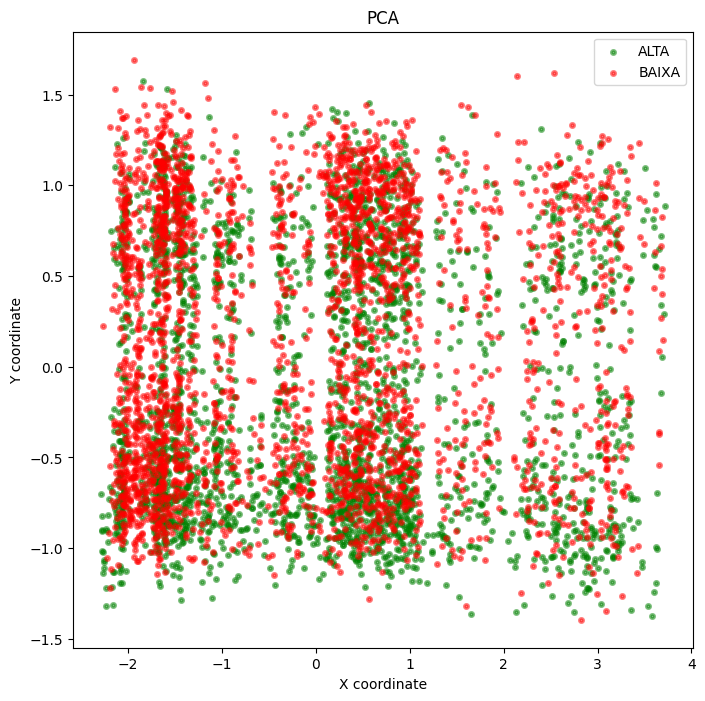

In [5]:
# Aplica o PCA
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_pca = pca.fit_transform(X_train_scaled)

# Plota o resultado
plt.figure(figsize=(8,8))

plt.scatter(X_pca[y_train==1, 0], X_pca[y_train==1, 1], color='green',
            alpha=0.5,label='ALTA',s=9, lw=2)
plt.scatter(X_pca[y_train==0, 0], X_pca[y_train==0, 1], color='red',
            alpha=0.5,label='BAIXA', s=9, lw=2)

plt.title("PCA")
plt.axis('tight')
plt.ylabel('Y coordinate')
plt.xlabel('X coordinate')
plt.legend()
plt.show()

### Metodos Não-Lineares Baseados em Manifold





#### Isomap

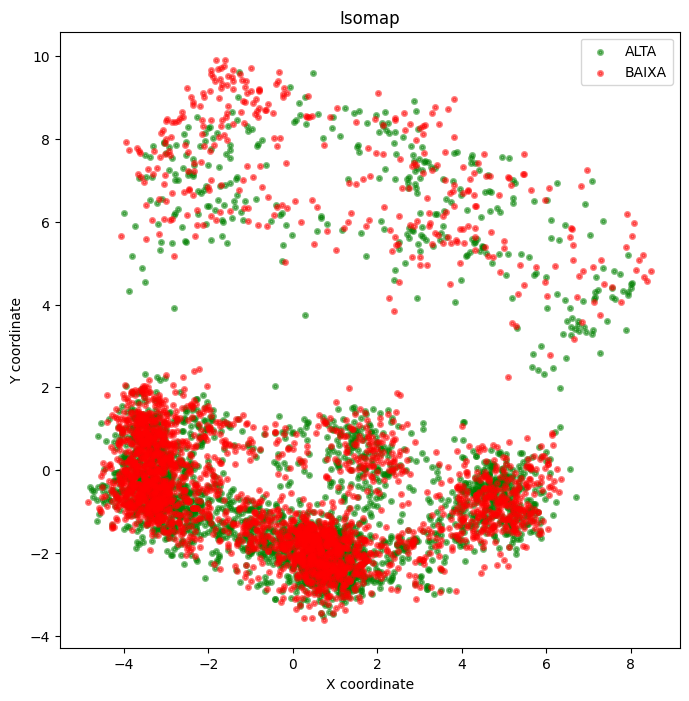

In [6]:
# Aplica o Isomap
isomap = manifold.Isomap(n_neighbors=10, n_components=2)
isomap.fit(X_train_scaled)
X_isomap = isomap.transform(X_train_scaled)

# Plota o resultado
plt.figure(figsize=(8,8))

plt.scatter(X_isomap[y_train==1, 0], X_isomap[y_train==1, 1], color='green',
            alpha=0.5,label='ALTA',s=9, lw=2)
plt.scatter(X_isomap[y_train==0, 0], X_isomap[y_train==0, 1], color='red',
            alpha=0.5,label='BAIXA', s=9, lw=2)

plt.title("Isomap")
plt.axis('tight')
plt.ylabel('Y coordinate')
plt.xlabel('X coordinate')
plt.legend()
plt.show()

#### Local Linear Embedding (LLE)

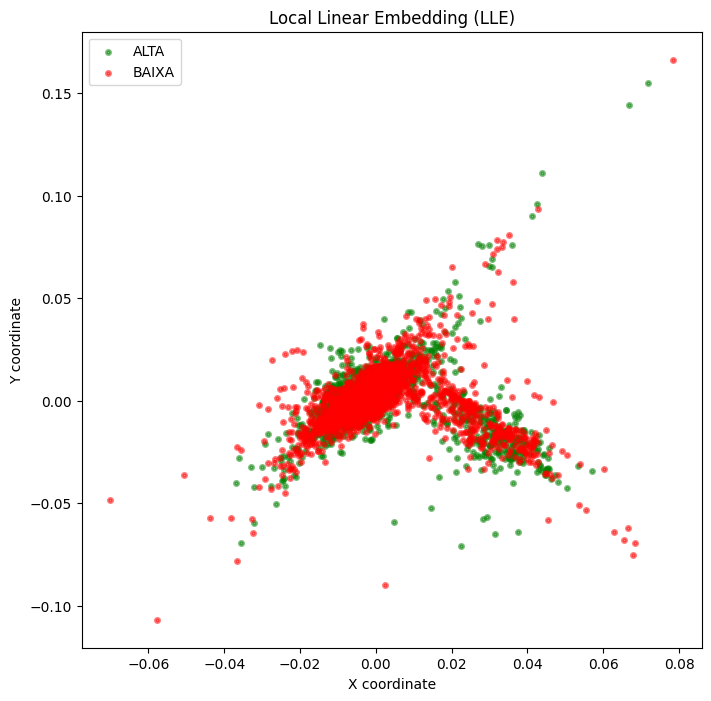

In [7]:
# Aplica o LLE
lle = manifold.LocallyLinearEmbedding(n_neighbors=20, n_components=2,method='standard')
lle.fit(X_train_scaled)
X_lle= lle.transform(X_train_scaled)

# Plota os resultados
plt.figure(figsize=(8,8))

plt.scatter(X_lle[y_train==1, 0], X_lle[y_train==1, 1], color='green',
            alpha=0.5,label='ALTA',s=9, lw=2)
plt.scatter(X_lle[y_train==0, 0], X_lle[y_train==0, 1], color='red',
            alpha=0.5,label='BAIXA', s=9, lw=2)

plt.title("Local Linear Embedding (LLE)")
plt.axis('tight')
plt.ylabel('Y coordinate')
plt.xlabel('X coordinate')
plt.legend()
plt.show()

#### t-distributed Stochastic Neighbor Embedding (t-SNE)

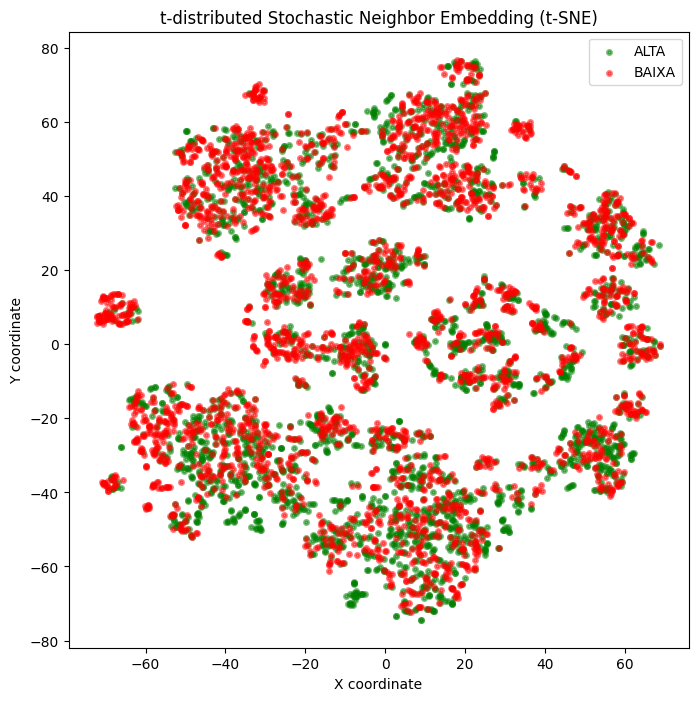

In [8]:
# Aplica o t-SNE
X_tsne = manifold.TSNE(n_components=2,init='pca',random_state=0).fit_transform(X_train_scaled)

plt.figure(figsize=(8,8))

plt.scatter(X_tsne[y_train==1, 0], X_tsne[y_train==1, 1], color='green',
            alpha=0.5,label='ALTA',s=9, lw=2)
plt.scatter(X_tsne[y_train==0, 0], X_tsne[y_train==0, 1], color='red',
            alpha=0.5,label='BAIXA', s=9, lw=2)

plt.title("t-distributed Stochastic Neighbor Embedding (t-SNE)")
plt.axis('tight')
plt.ylabel('Y coordinate')
plt.xlabel('X coordinate')
plt.legend()
plt.show()

## Data Visualization

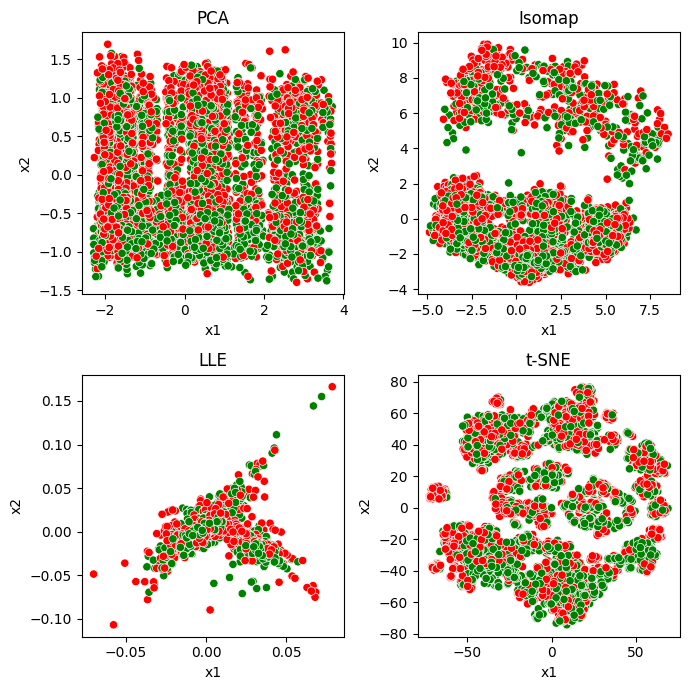

In [9]:
# Dados
df_PCA = pd.concat([pd.DataFrame(X_pca, columns=['x1','x2']),
                    pd.DataFrame(y_train).reset_index(drop=True)], axis=1)
df_Isomap = pd.concat([pd.DataFrame(X_isomap, columns=['x1','x2']),
                    pd.DataFrame(y_train).reset_index(drop=True)], axis=1)
df_LLE = pd.concat([pd.DataFrame(X_lle, columns=['x1','x2']),
                    pd.DataFrame(y_train).reset_index(drop=True)], axis=1)
df_tSNE = pd.concat([pd.DataFrame(X_tsne, columns=['x1','x2']),
                    pd.DataFrame(y_train).reset_index(drop=True)], axis=1)

# Configuração dos subplots
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
fig.subplots_adjust(hspace=0.4)

# Lista de DataFrames
dataframes = [df_PCA, df_Isomap, df_LLE, df_tSNE]

# Loop para criar os 4 subplots
for i, df in  enumerate(zip(dataframes,['PCA', 'Isomap', 'LLE', 't-SNE'])):
    row, col = i // 2, i % 2
    ax = axes[row, col]
    sns.scatterplot(data=df[0], x='x1', y='x2', hue='D+1 ALTA',
                    palette={0: 'red', 1: 'green'},
                    ax=ax,
                    legend=False)
    ax.set_title(f'{df[1]}')

# Ajuste de layout e exibição
plt.tight_layout()
plt.show()

## Save models and data

In [10]:
# Training set scaled and Scaler
joblib.dump(scaler, 'modelo_scaler.pkl')
pd.concat([pd.DataFrame(X_train_scaled, columns=list(columns_names)),
                    pd.DataFrame(y_train).reset_index(drop=True)],
          axis=1).to_csv('trainingset_scaled.csv')

 # PCA
joblib.dump(pca, 'modelo_pca.pkl')
df_PCA.to_csv('PCA_trainingset.csv')

# Isomap
joblib.dump(isomap, 'modelo_isomap.pkl')
df_Isomap.to_csv('Isomap_trainingset.csv')

# LLE
joblib.dump(lle, 'modelo_lle.pkl')
df_LLE.to_csv('LLE_trainingset.csv')

## Conclusion

## References

https://laid-back-scientist.com/en/talib

https://docs.profiling.ydata.ai/

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html



## Appendix

## Anotações

* O MDS está demorando de mais para convergir, por isso não o usarei.

## draft